In [2]:
import pickle
import matplotlib.pyplot as plt

obj_month_list = [f"{year}{month:02d}" for year in range(1995, 2017) for month in range(1, 13)]

## Plotting for Portfolio

In [4]:
with open("outputs/portfolio/long_short_eNet.pkl", "rb") as f:
    long_short_eNet = pickle.load(f)

with open("outputs/portfolio/long_eNet.pkl", "rb") as f:
    long_eNet = pickle.load(f)

with open("outputs/portfolio/long_short_nn3.pkl", "rb") as f:
    long_short_nn3 = pickle.load(f)

with open("outputs/portfolio/long_nn3.pkl", "rb") as f:
    long_nn3 = pickle.load(f)

with open("outputs/portfolio/long_short_nn3_classifier.pkl", "rb") as f:
    long_short_nn3_classifier = pickle.load(f)

with open("outputs/portfolio/long_nn3_classifier.pkl", "rb") as f:
    long_nn3_classifier = pickle.load(f)

with open("outputs/portfolio/long_short_nn5.pkl", "rb") as f:
    long_short_nn5 = pickle.load(f)

with open("outputs/portfolio/long_nn5.pkl", "rb") as f:
    long_nn5 = pickle.load(f)

with open("outputs/portfolio/long_rf.pkl", "rb") as f:
    long_rf = pickle.load(f)

with open("outputs/portfolio/long_short_rf.pkl", "rb") as f:
    long_short_rf = pickle.load(f)

with open("outputs/portfolio/long_logistic.pkl", "rb") as f:
    long_logistic = pickle.load(f)

with open("outputs/portfolio/long_short_logistic.pkl", "rb") as f:
    long_short_logistic = pickle.load(f)

with open("outputs/portfolio/sp500.pkl", "rb") as f:
    sp500 = pickle.load(f)
    sp500 = sp500[324-264:]

with open("outputs/portfolio/risk_free.pkl", "rb") as f:
    risk_free = pickle.load(f)
    risk_free = risk_free[324-264:]

# plt.figure(figsize=(27, 12))
# plt.plot(obj_month_list, long_short_eNet, label="long short eNet")
# plt.plot(obj_month_list, long_eNet, label="long eNet")
# plt.plot(obj_month_list, long_short_nn3, label="long short NN3")
# plt.plot(obj_month_list, long_nn3, label="long NN3")
# plt.plot(obj_month_list, long_short_nn3_classifier, label="long short NN3 classifier")
# plt.plot(obj_month_list, long_nn3_classifier, label="long NN3 classifier")
# plt.plot(obj_month_list, long_short_nn5, label="long short NN5")
# plt.plot(obj_month_list, long_nn5, label="long NN5")
# plt.plot(obj_month_list, sp500, label="sp500")
# plt.axhline(0, color='r', linestyle="--")
# # plt.plot(test_months, validation_r2s, label="R^2 in validation years")
# plt.xticks(obj_month_list[::5], rotation='vertical', fontsize=14)
# plt.xlabel('Date (YYYYMM)', fontsize=20)
# plt.ylabel('Excess Return', fontsize=20)
# plt.legend(fontsize=20)
# plt.show()

In [7]:
# sp500[0] = 1
def adjusted_cumulative_product(array):
    array = array + risk_free # add back risk-free return
    adjusted_array = []
    cumulative_product = 1
    for value in array:
        adjusted_value = 1 + value
        cumulative_product *= adjusted_value
        adjusted_array.append(cumulative_product)
    return adjusted_array

accum_long_short_eNet = adjusted_cumulative_product(long_short_eNet)
accum_long_eNet = adjusted_cumulative_product(long_eNet)
accum_long_short_nn3 = adjusted_cumulative_product(long_short_nn3)
accum_long_nn3 = adjusted_cumulative_product(long_nn3)
accum_long_short_nn3_classifier = adjusted_cumulative_product(long_short_nn3_classifier)
accum_long_nn3_classifier = adjusted_cumulative_product(long_nn3_classifier)
accum_long_short_nn5 = adjusted_cumulative_product(long_short_nn5)
accum_long_nn5 = adjusted_cumulative_product(long_nn5)
accum_long_short_rf = adjusted_cumulative_product(long_short_rf)
accum_long_rf = adjusted_cumulative_product(long_rf)
accum_long_short_logistic = adjusted_cumulative_product(long_short_logistic)
accum_long_logistic = adjusted_cumulative_product(long_logistic)
accum_sp500 = adjusted_cumulative_product(sp500)


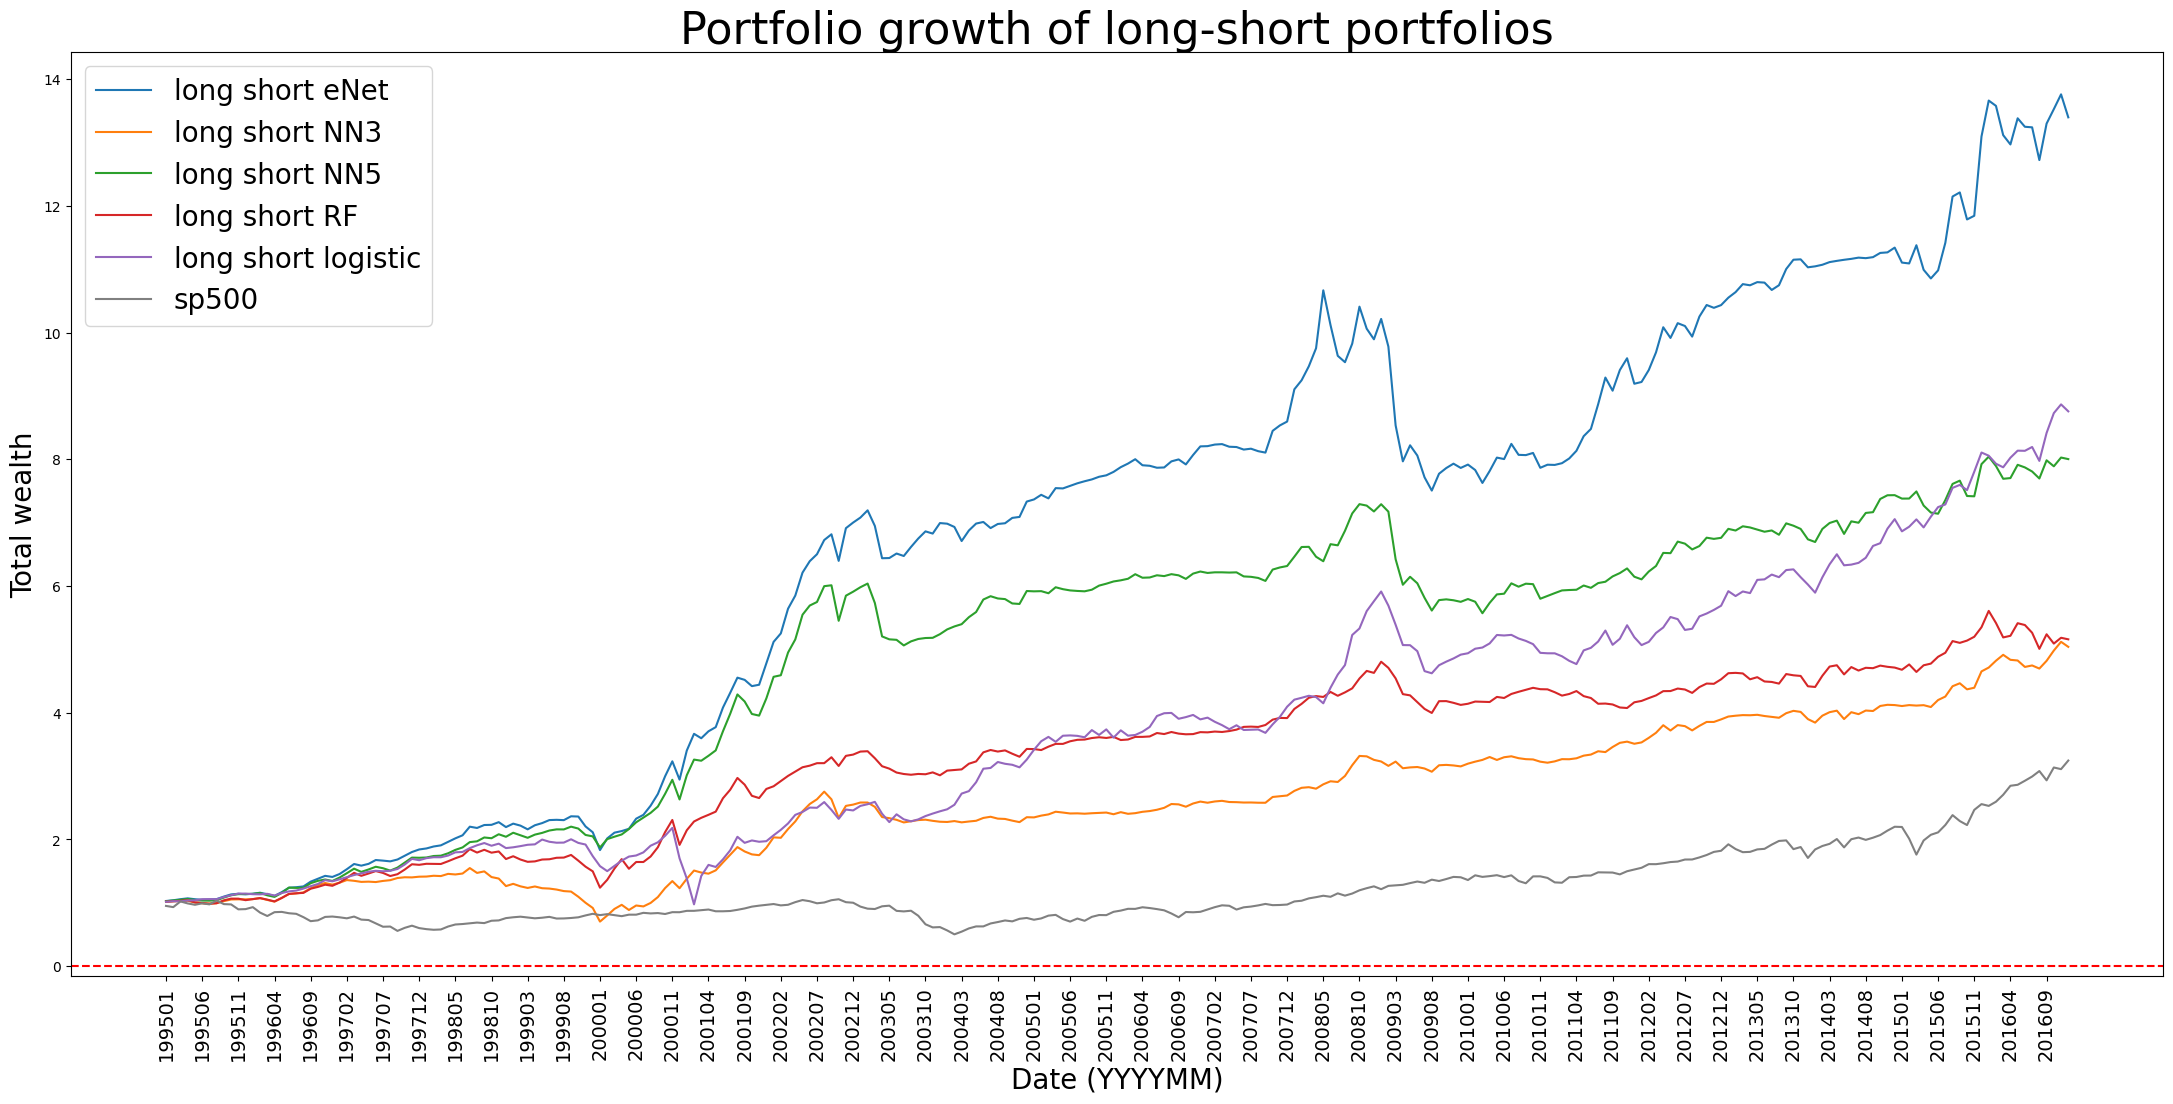

In [8]:
plt.figure(figsize=(27, 12))

plt.plot(obj_month_list, accum_long_short_eNet, label="long short eNet")
plt.plot(obj_month_list, accum_long_short_nn3, label="long short NN3")
# plt.plot(obj_month_list, accum_long_short_nn3_classifier, label="long short NN3 classifier")
plt.plot(obj_month_list, accum_long_short_nn5, label="long short NN5")
plt.plot(obj_month_list, accum_long_short_rf, label="long short RF")
plt.plot(obj_month_list, accum_long_short_logistic, label="long short logistic")
plt.plot(obj_month_list, accum_sp500, label="sp500", color="grey")

plt.axhline(0, color='r', linestyle="--")
plt.title("Portfolio growth of long-short portfolios", fontsize=32)
plt.xticks(obj_month_list[::5], rotation='vertical', fontsize=14)
plt.xlabel('Date (YYYYMM)', fontsize=20)
plt.ylabel('Total wealth', fontsize=20)
plt.legend(fontsize=20)
plt.show()

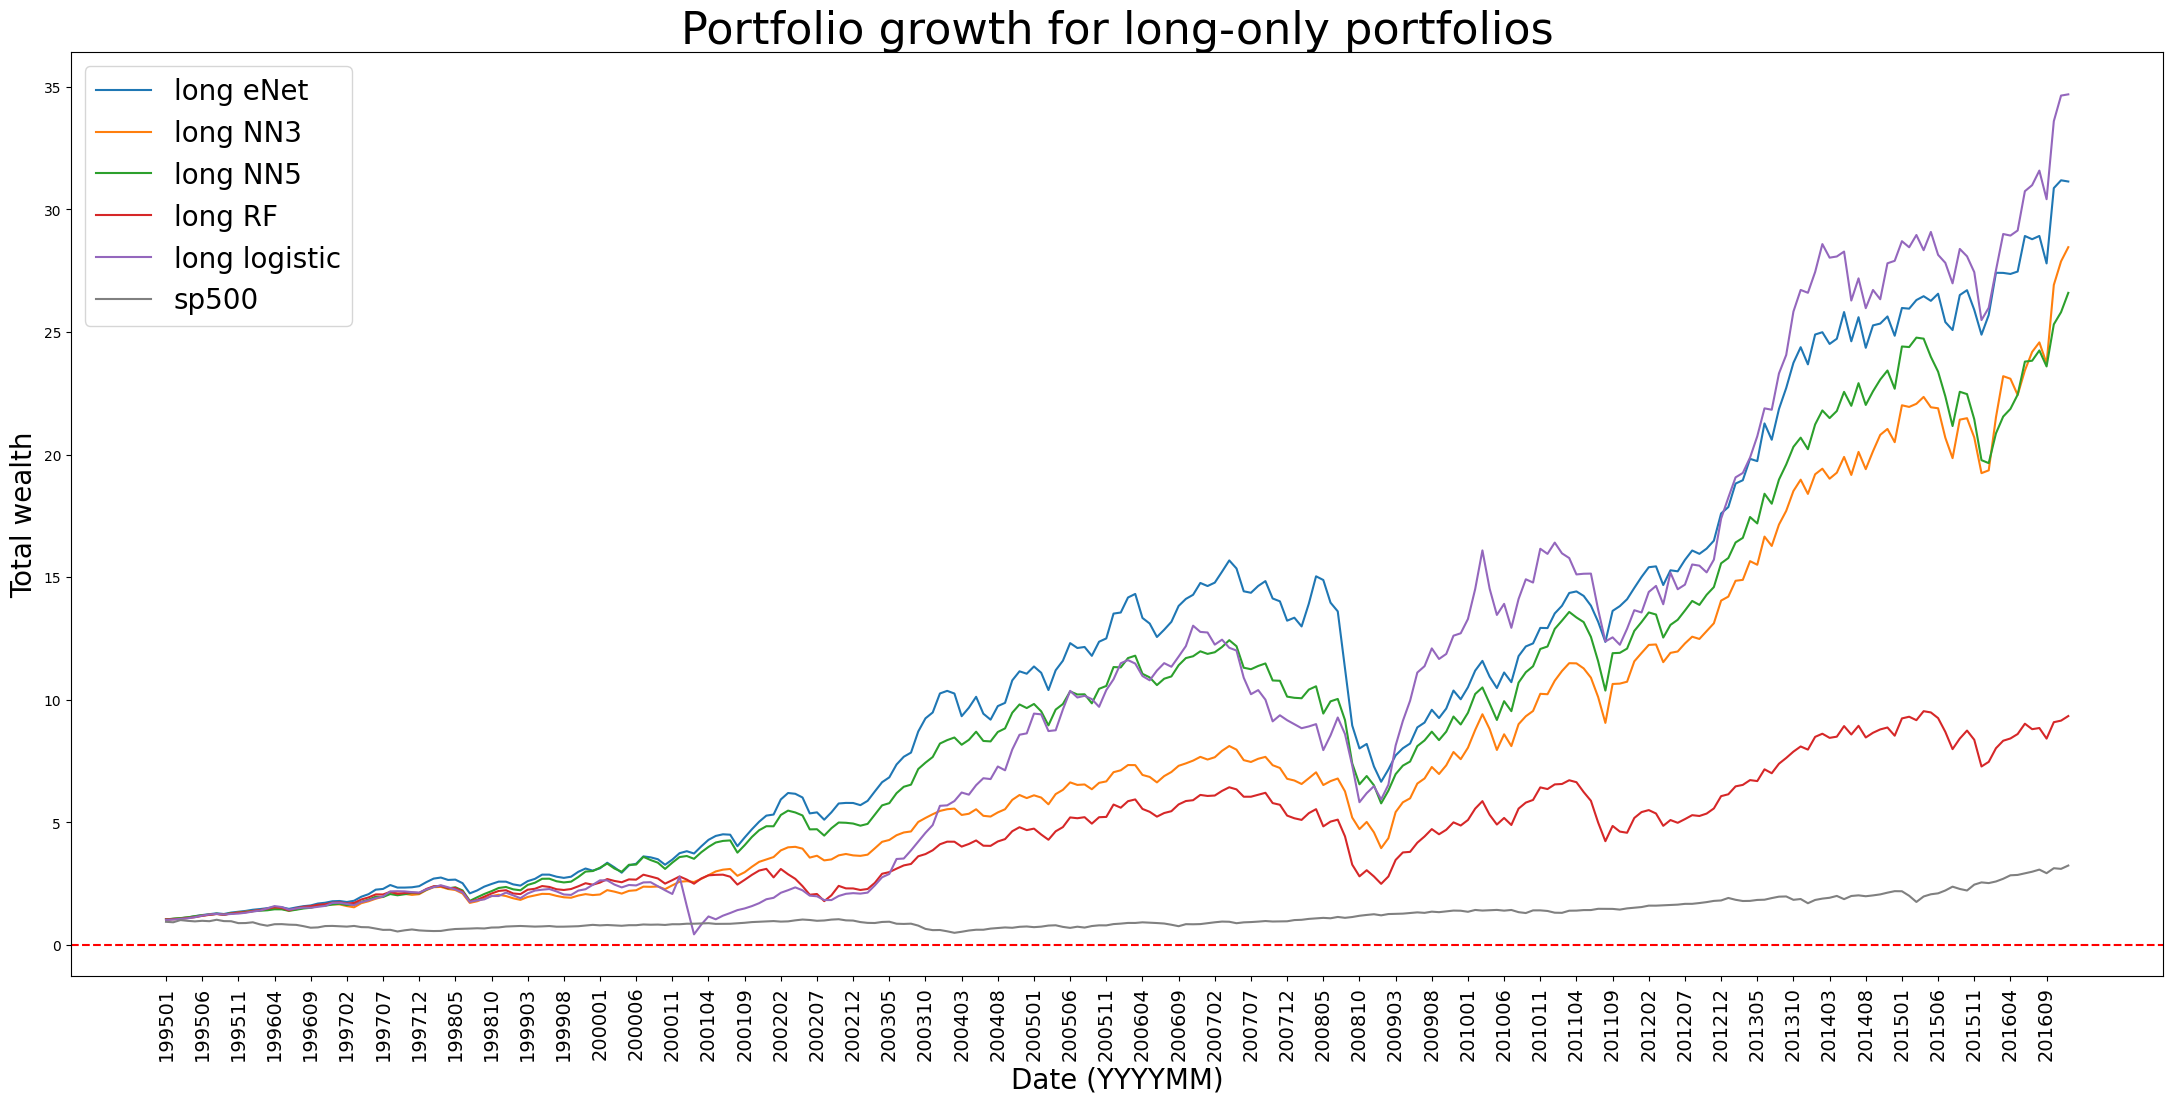

In [9]:
plt.figure(figsize=(27, 12))

plt.plot(obj_month_list, accum_long_eNet, label="long eNet")
plt.plot(obj_month_list, accum_long_nn3, label="long NN3")
# plt.plot(obj_month_list, accum_long_nn3_classifier, label="long NN3 classifier")
plt.plot(obj_month_list, accum_long_nn5, label="long NN5")
plt.plot(obj_month_list, accum_long_rf, label="long RF")
plt.plot(obj_month_list, accum_long_logistic, label="long logistic")
plt.plot(obj_month_list, accum_sp500, label="sp500", color="grey")

plt.axhline(0, color='r', linestyle="--")
plt.title("Portfolio growth for long-only portfolios", fontsize=32)
plt.xticks(obj_month_list[::5], rotation='vertical', fontsize=14)
plt.xlabel('Date (YYYYMM)', fontsize=20)
plt.ylabel('Total wealth', fontsize=20)
plt.legend(fontsize=20)
plt.show()